## Компания предоставила ежегодные данные о страховании автомобилей. Задача — проанализировать поведение клиентов и определить, оформит ли пользователь страховку.

### Ставим либы

In [1]:
!pip install matplotlib pandas seaborn scikit-learn

### Начинаем анализ датасета

In [2]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
    
import pandas as pd             
import seaborn as sns           
import sklearn  

### Загружаем данные


In [3]:
url = "Car_Insurance_Claim.csv"
data_raw = pd.read_csv(url)

Сначала изучим размеры таблицы: количество строк (каждая строка представляет одну квартиру) и количество столбцов (каждый столбец соответствует определенному признаку).

In [4]:
data_raw.shape

(10000, 19)

Таблица содержит данные о 10 000 клиентах, сгруппированные по 19 категориям.

In [5]:
data_raw

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


Метод `data_raw.head()` выводит первые несколько строк таблицы для первичного ознакомления с данными.

In [6]:
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Рассмотрим последние строки датасета с помощью метода `data_raw.tail()`.

In [7]:
data_raw.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

В таблице представлены следующие столбцы с данными:  

- **`ID`** — идентификатор водителя (числовой).  
- **`AGE`** — возраст клиента (категориальный).  
- **`GENDER`** — пол клиента (категориальный).  
- **`RACE`** — раса клиента (категориальный).  
- **`DRIVING_EXPERIENCE`** — стаж вождения (категориальный).  
- **`EDUCATION`** — уровень образования (категориальный).  
- **`INCOME`** — уровень дохода (категориальный).  
- **`CREDIT_SCORE`** — кредитный рейтинг (числовой).  
- **`VEHICLE_OWNERSHIP`** — наличие собственного транспортного средства (числовой).  
- **`VEHICLE_YEAR`** — год выпуска транспортного средства (категориальный).  
- **`MARRIED`** — семейное положение (числовой).  
- **`CHILDREN`** — наличие детей (числовой).  
- **`POSTAL_CODE`** — почтовый индекс (числовой).  
- **`ANNUAL_MILEAGE`** — годовой пробег автомобиля (числовой).  
- **`VEHICLE_TYPE`** — тип транспортного средства (категориальный).  
- **`SPEEDING_VIOLATIONS`** — количество штрафов за превышение скорости (числовой).  
- **`DUIS`** — количество случаев вождения в нетрезвом виде (числовой).  
- **`PAST_ACCIDENTS`** — количество аварий (числовой).  
- **`OUTCOME`** — результат рассмотрения страховки (числовой).  

Для оптимизации работы с данными заменим тип столбцов, содержащих категориальные значения, на тип `category`. Это уменьшит объем занимаемой памяти и ускорит операции с этими столбцами.  
```

In [9]:
data_raw_1 = data_raw.copy()
data_raw['AGE'] = data_raw['AGE'].astype('category')
data_raw['GENDER'] = data_raw['GENDER'].astype('category')
data_raw['RACE'] = data_raw['RACE'].astype('category')
data_raw['DRIVING_EXPERIENCE'] = data_raw['DRIVING_EXPERIENCE'].astype('category')
data_raw['EDUCATION'] = data_raw['EDUCATION'].astype('category')
data_raw['INCOME'] = data_raw['INCOME'].astype('category')
data_raw['VEHICLE_YEAR'] = data_raw['VEHICLE_YEAR'].astype('category')
data_raw['VEHICLE_TYPE'] = data_raw['VEHICLE_TYPE'].astype('category')


In [10]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

## Визуализация и статистика

Метод `describe()` позволяет получить сводную статистическую информацию о числовых и категориальных признаках в таблице. Для числовых данных выводятся такие параметры, как количество значений, среднее, стандартное отклонение, минимальное и максимальное значения, а также квартили. Для категориальных данных отображается количество уникальных значений, мода и частота моды.  

In [11]:
data_raw.describe()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


По умолчанию метод `describe()` предоставляет информацию только о количественных признаках. Чтобы получить информацию о категориальных признаках, нужно указать параметр `include='category'`.

In [12]:
data_raw.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Большинство клиентов, запрашивающих страховку, обладают следующими характеристиками:  
- Отсутствие нарушений ПДД в прошлом.  
- Максимальный кредитный рейтинг — 0.96.  
- Небольшой водительский стаж (0–9 лет).  
- Основная возрастная группа — 26–39 лет.  
- Преимущественно женщины.  
- Закончили старшую школу и имеют высокий уровень дохода.  

### Матрица корреляции:

In [16]:
data_numeric = data_raw_1.select_dtypes(include=[float, int]) 
corr_mat = data_numeric.corr()
corr_mat

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


Удобно использовать визуальное представление этой матрицы: чем светлее ячейка, тем выше по абсолютной величине коэффициент корреляции.

<Axes: >

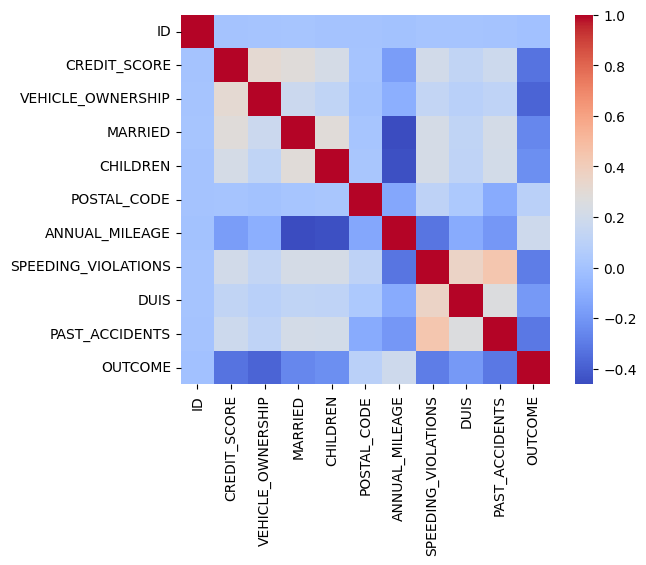

In [17]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Выведем коэффициенты корреляции, превышающие заданное значение.

In [18]:
corr_mat >= 0.4

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,True,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,True,False,False,False,False,False,False,False,False,False
VEHICLE_OWNERSHIP,False,False,True,False,False,False,False,False,False,False,False
MARRIED,False,False,False,True,False,False,False,False,False,False,False
CHILDREN,False,False,False,False,True,False,False,False,False,False,False
POSTAL_CODE,False,False,False,False,False,True,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,False,False,False,True,False,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,False,True,False,True,False
DUIS,False,False,False,False,False,False,False,False,True,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,True,False,True,False


Положительная корреляция наблюдается, когда одна переменная уменьшается при уменьшении другой или увеличивается при увеличении другой. Мы видим, что признак `DUIS` (вождение в нетрезвом виде) связан с признаками `SPEEDING_VIOLATIONS` (штрафы за превышение скорости) и `PAST_ACCIDENTS` (аварии), поскольку вождение в нетрезвом виде повышает вероятность как превышения скорости, так и возникновения аварийных ситуаций.

In [19]:
corr_mat.where(np.triu(corr_mat >= 0.35, k=1)).stack().sort_values(ascending=False)

SPEEDING_VIOLATIONS  PAST_ACCIDENTS    0.443074
                     DUIS              0.359838
dtype: float64

In [20]:
corr_mat <= -0.3

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,False,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,False,False,False,False,False,False,False,False,False,True
VEHICLE_OWNERSHIP,False,False,False,False,False,False,False,False,False,False,True
MARRIED,False,False,False,False,False,False,True,False,False,False,False
CHILDREN,False,False,False,False,False,False,True,False,False,False,False
POSTAL_CODE,False,False,False,False,False,False,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,True,True,False,False,True,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,True,False,False,False,False
DUIS,False,False,False,False,False,False,False,False,False,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,False,False,False,True


Некоторые коэффициенты корреляции могут быть как положительными, так и отрицательными. Отрицательная корреляция означает, что увеличение одной переменной связано с уменьшением другой. Мы наблюдаем взаимосвязь между признаками `PAST_ACCIDENTS` и `OUTCOME`: компаниям невыгодно выдавать страховку водителям, которые часто попадают в аварии. Также можно отметить обратную связь между признаками `SPEEDING_VIOLATIONS` и `CHILDREN`: люди с детьми склонны водить аккуратнее.

In [21]:
corr_mat.where(np.triu(corr_mat <= -0.3, k=1)).stack().sort_values(ascending=False)

PAST_ACCIDENTS     OUTCOME               -0.311495
ANNUAL_MILEAGE     SPEEDING_VIOLATIONS   -0.323547
CREDIT_SCORE       OUTCOME               -0.325286
VEHICLE_OWNERSHIP  OUTCOME               -0.378921
CHILDREN           ANNUAL_MILEAGE        -0.447655
MARRIED            ANNUAL_MILEAGE        -0.462193
dtype: float64

Построим диаграммы рассеивания:

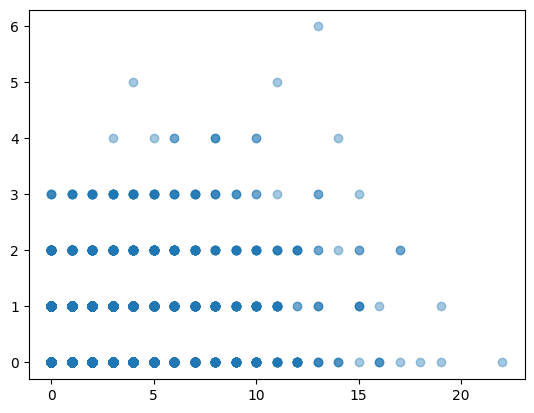

In [22]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['DUIS'], alpha=0.4)

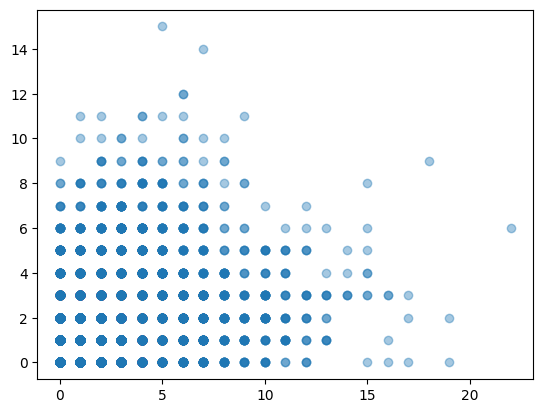

In [23]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['PAST_ACCIDENTS'], alpha=0.4)

Построим гистoграммы :

<Axes: xlabel='AGE', ylabel='count'>

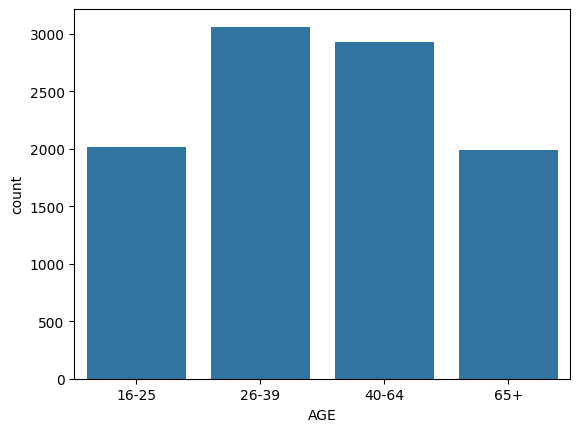

In [25]:
sns.countplot(x='AGE', data=data_raw)

Заметим, что больше всего страховку запрашивают люди в возрасте 26-39 лет.

<Axes: xlabel='GENDER', ylabel='count'>

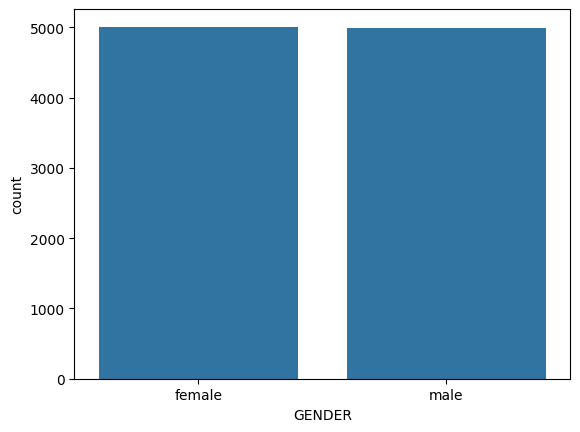

In [26]:
sns.countplot(x='GENDER', data=data_raw)

Страховка нужна всем, как женщинам, так и мужчинам.

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='count'>

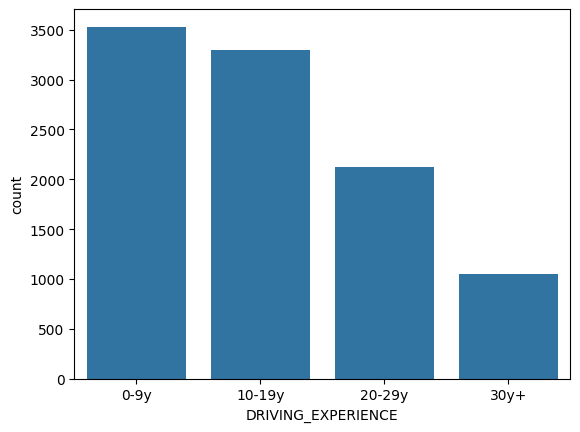

In [28]:
sns.countplot(x='DRIVING_EXPERIENCE', data=data_raw)

Страховку чаще всего одобряют водителям с небольшим стажем.

<Axes: xlabel='EDUCATION', ylabel='count'>

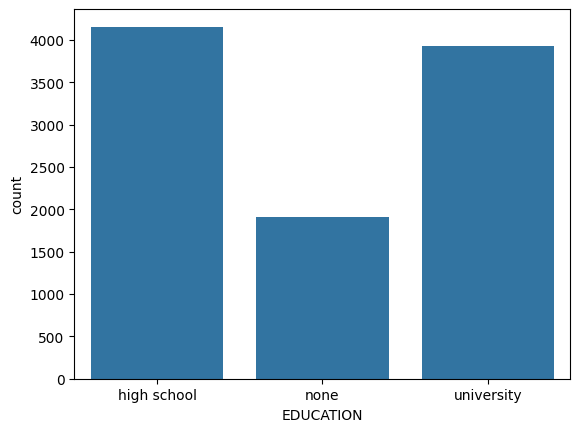

In [29]:
sns.countplot(x='EDUCATION', data=data_raw)

Больше всего за страховкой обращаются люди с оконченным средним образованием.

<Axes: xlabel='AGE', ylabel='count'>

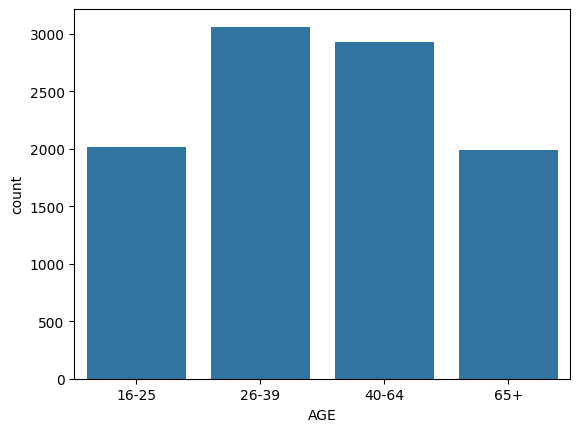

In [31]:
sns.countplot(x='AGE', data=data_raw)

Видим, что больше всего за страховкой обращаются люди возраста 26-64 лет.

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='OUTCOME'>

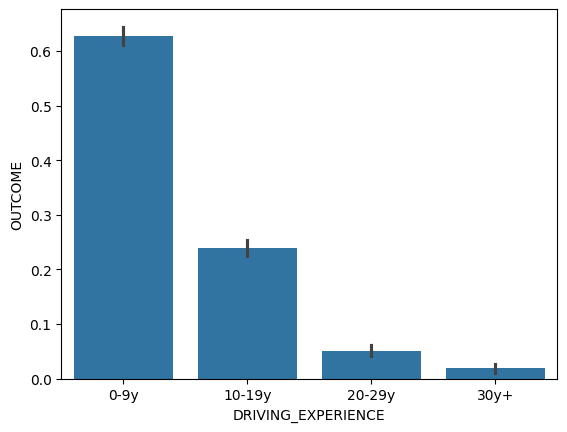

In [32]:
sns.barplot(data=data_raw, x="DRIVING_EXPERIENCE", y="OUTCOME")

Чаще страховку дают молодым водителям.

<Axes: xlabel='CHILDREN', ylabel='count'>

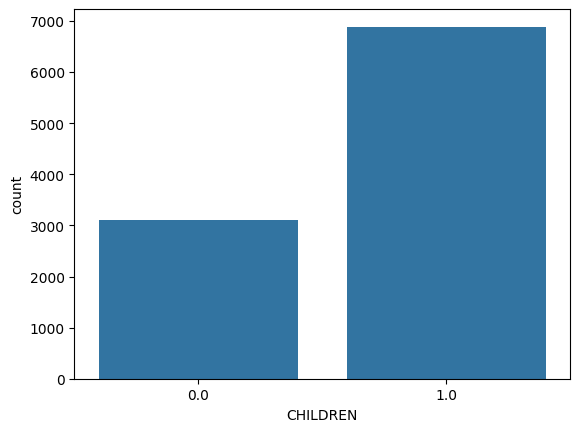

In [33]:
sns.countplot(x='CHILDREN', data=data_raw)

Видим, что в страховке больше заинтересованы люди, у которых есть дети.

### Заполнение пропущенных значений

Пропущенные значения в таблице обозначены как `np.nan`. Давайте посмотрим, сколько пропущенных значений содержится в каждом столбце матрицы.

In [34]:
data_raw.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

С пропущенными значениями надо что-то сделать. Заполним пропущенные значения медианной:

In [36]:
for col in data_raw.select_dtypes(include=['category']).columns:
    data_raw[col] = data_raw[col].cat.codes

data_raw.fillna(data_raw.median(axis=0), axis=0, inplace=True)


Проверим заполненые значения:

In [37]:
data_raw.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Пропущенных значений больше нет

### Обработка категориальных признаков

Для дальнейшей обработки данных преобразуем категориальные признаки в числовые. Заменим бинарные признаки на 0 и 1, а для небинарных признаков применим метод бинаризации.

In [38]:
AGE_dummies = pd.get_dummies(data_raw['AGE'])
DRIVING_EXPERIENCE_dummies = pd.get_dummies(data_raw['DRIVING_EXPERIENCE'])
EDUCATION_dummies = pd.get_dummies(data_raw['EDUCATION'])
INCOME_dummies = pd.get_dummies(data_raw['INCOME'])
data_raw['GENDER'] = pd.factorize(data_raw['GENDER'])[0]
data_raw['RACE'] = pd.factorize(data_raw['RACE'])[0]
data_raw['VEHICLE_YEAR'] = pd.factorize(data_raw['VEHICLE_YEAR'])[0]
data_raw['VEHICLE_TYPE'] = pd.factorize(data_raw['VEHICLE_TYPE'])[0]
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


Обработаем признаки "AGE", "DRIVING_EXPERIENCE", "EDUCATION" и "INCOME".

In [39]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(10000, 19)


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


### Наличие выбросов

##### Числовые признаки:

In [40]:
data_raw['CREDIT_SCORE'].value_counts()

CREDIT_SCORE
0.525033    982
0.561531      1
0.620361      1
0.491151      1
0.294797      1
           ... 
0.430527      1
0.710640      1
0.670593      1
0.448408      1
0.468689      1
Name: count, Length: 9019, dtype: int64

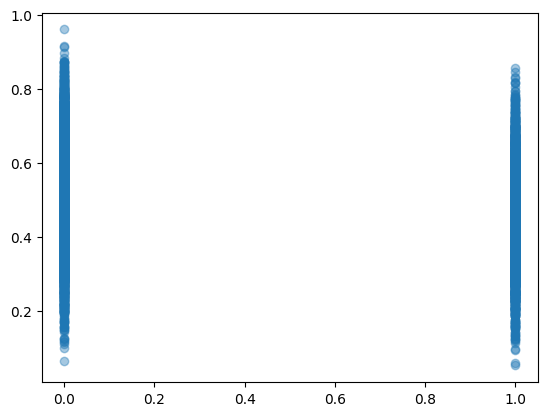

In [41]:
plt.scatter(data_raw['OUTCOME'], data_raw['CREDIT_SCORE'], alpha=0.4)

In [64]:
data_raw['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [42]:
data_raw['MARRIED'].value_counts()

MARRIED
0.0    5018
1.0    4982
Name: count, dtype: int64

In [43]:
data_raw['CHILDREN'].value_counts()

CHILDREN
1.0    6888
0.0    3112
Name: count, dtype: int64

In [44]:
data_raw['POSTAL_CODE'].value_counts()

POSTAL_CODE
10238    6940
32765    2456
92101     484
21217     120
Name: count, dtype: int64

In [45]:
data_raw['ANNUAL_MILEAGE'].value_counts()

ANNUAL_MILEAGE
12000.0    2175
11000.0    1253
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: count, dtype: int64

In [46]:
data_raw['SPEEDING_VIOLATIONS'].value_counts()

SPEEDING_VIOLATIONS
0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: count, dtype: int64

In [47]:
data_raw['DUIS'].value_counts()

DUIS
0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: count, dtype: int64

In [48]:
data_raw['PAST_ACCIDENTS'].value_counts()

PAST_ACCIDENTS
0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: count, dtype: int64

In [49]:
data_raw['OUTCOME'].value_counts()

OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64

### Нормализация признаков

Наиболее часто применяют один из двух следующих методов:  
- *приведение к отрезку $[0,1]$* — линейное преобразование, которое масштабирует все значения в пределах заданного отрезка.

In [50]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500483,0.496500,0.499000,0.098800,0.356433,0.48855,0.520733,0.510612,0.697000,0.696700,0.498200,0.688800,0.117593,0.486300,0.047700,0.067405,0.039867,0.070420,0.313300
std,0.290067,0.341759,0.500024,0.298408,0.330151,0.44946,0.336028,0.144117,0.459578,0.459707,0.500022,0.463008,0.231064,0.134082,0.213141,0.101908,0.092498,0.110164,0.463858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249569,0.333333,0.000000,0.000000,0.000000,0.00000,0.333333,0.416714,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501739,0.333333,0.000000,0.000000,0.333333,0.50000,0.666667,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753968,0.666667,1.000000,0.000000,0.666667,1.00000,0.666667,0.610769,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,0.000000,0.090909,0.000000,0.133333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Выбор признаков

Используем  все признаки кроме ID, так как он создается только для идентификации

In [51]:
X = data_normal.drop (['ID', 'OUTCOME'], axis=1) 
y = data_raw['OUTCOME']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
N_train, N_test

(7500, 2500)

### Метод ближайших соседей

Попробуем обучить нашу модель с помощью метода `kNN`

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [54]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict=knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [55]:
err_test*100, err_train*100

(np.float64(18.8), np.float64(15.786666666666665))

Получаем ошибку на тестовой выборке 18.8%, а на обучающей - 15.7%.

Увеличим число соседей до 20:

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [57]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict=knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [58]:
err_test*100, err_train*100

(np.float64(18.4), np.float64(16.906666666666666))

Точность на тестовой выборке увеличилась, но уменьшилась на обучающей

### Метод Random Forest

In [61]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

(err_train, err_test)


(np.float64(0.0002666666666666667), np.float64(0.1628))

In [62]:
err_test*100, err_train*100

(np.float64(16.28), np.float64(0.02666666666666667))

По результатам видно, что метод Random Forest дает более высокую точность на обучающей выборке, а на тестовой дает точно такую же, как в предыдущем методе, сравнивая с методом ближайших соседей, в данном случае для задачи классификации лучше использовать Random Forest

### Выводы 

В результате выполнения лабораторной работы была решена задача классификации. Анализируя данные, мы определяли, будет ли получена страховка. Обучение и классификация проводились с использованием метода ближайших k-соседей (рассматривались случаи с 10 и 20 соседями) и метода Random Forest. Ошибки получились достаточно большими, что может быть связано с высокой долей случайности при наступлении страхового случая, что делает невозможным точное предсказание. Это объясняет высокий процент ошибок. Также стоит отметить, что ошибка на тестовой выборке оказалась больше, чем на обучающей.